In [16]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import pyart

In [17]:
radar = pyart.io.read('MDV-20150805-143535-PPIVol.nc')
radar.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (9270,)>
elevation: <ndarray of type: float32 and shape: (9270,)>
fields:
	DBZH: <ndarray of type: float32 and shape: (9270, 2500)>
	DBZV: <ndarray of type: float32 and shape: (9270, 2500)>
	VELH: <ndarray of type: float32 and shape: (9270, 2500)>
	VELV: <ndarray of type: float32 and shape: (9270, 2500)>
fixed_angle: <ndarray of type: float32 and shape: (18,)>
instrument_parameters:
	frequency: <ndarray of type: float32 and shape: (1,)>
	pulse_width: <ndarray of type: float32 and shape: (9270,)>
	prt_mode: <ndarray of type: |S1 and shape: (18, 10)>
	prt: <ndarray of type: float32 and shape: (9270,)>
	prt_ratio: <ndarray of type: float32 and shape: (9270,)>
	polarization_mode: <ndarray of type: |S1 and shape: (18, 10)>
	nyquist_velocity: <ndarray of type: float32 and shape: (9270,)>
	n_samples: <ndarray of type: int32 and shape: (9270,)>
	radar_a

In [18]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

In [19]:
velh = radar.fields['VELH']['data'][:]
velh

masked_array(
  data=[[19.369998931884766, --, 21.770000457763672, ..., -11.25,
         -11.4399995803833, --],
        [20.850000381469727, --, -10.149999618530273, ..., 3.5,
         -10.699999809265137, --],
        [8.489999771118164, -7.929999828338623, --, ...,
         -9.779999732971191, --, --],
        ...,
        [-5.71999979019165, -6.639999866485596, -2.759999990463257, ...,
         10.149999618530273, 8.300000190734863, --],
        [-19.559999465942383, --, 11.4399995803833, ...,
         -4.059999942779541, -6.819999694824219, --],
        [-20.479999542236328, 10.149999618530273, 13.469999313354492,
         ..., --, -7.009999752044678, -13.649999618530273]],
  mask=[[False,  True, False, ..., False, False,  True],
        [False,  True, False, ..., False, False,  True],
        [False, False,  True, ..., False,  True,  True],
        ...,
        [False, False, False, ..., False, False,  True],
        [False,  True, False, ..., False, False,  True],
        [False

In [20]:
velh[velh<=-32768]=np.nan

In [30]:
pd.DataFrame(velh)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,19.369999,NaN,21.770000,-10.88,-10.70,-10.52,-11.07,-11.07,-10.88,-10.70,...,-16.240000,20.299999,-15.679999,2.210000,22.33,NaN,NaN,-11.25,-11.44,NaN
1,20.850000,NaN,-10.150000,-11.07,-10.88,-10.88,-11.07,-10.70,-10.52,-10.70,...,-1.840000,-10.700000,1.100000,18.639999,20.48,NaN,NaN,3.50,-10.70,NaN
2,8.490000,-7.93,NaN,-11.99,-11.25,-11.44,-11.25,-10.70,-10.70,-11.07,...,8.849999,-11.620000,11.990000,NaN,10.70,21.77,-22.33,-9.78,NaN,NaN
3,22.699999,-8.49,NaN,-10.88,-11.07,-10.88,-10.88,-10.70,-10.52,-10.70,...,7.380000,18.270000,13.469999,NaN,11.07,4.06,-20.48,4.98,NaN,NaN
4,-2.760000,NaN,-8.849999,-10.52,-11.07,-10.88,-10.70,-10.52,-10.52,-10.88,...,19.189999,NaN,NaN,NaN,NaN,NaN,NaN,-7.75,-22.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9265,2.950000,-8.12,NaN,-2.21,-2.76,-3.13,-2.76,-2.76,-2.95,-2.39,...,NaN,NaN,NaN,6.450000,6.45,NaN,NaN,NaN,NaN,NaN
9266,16.980000,-7.38,NaN,-2.39,-2.95,-3.13,-2.58,-2.58,-2.58,-2.39,...,NaN,NaN,NaN,6.820000,23.25,NaN,NaN,NaN,NaN,NaN
9267,-5.720000,-6.64,-2.760000,-1.84,-2.58,-2.95,-2.76,-2.95,-3.32,-2.76,...,NaN,9.220000,-6.450000,NaN,0.00,-4.24,-3.50,10.15,8.30,NaN
9268,-19.559999,NaN,11.440000,-2.21,-2.95,-2.95,-2.39,-2.58,-2.95,-2.76,...,NaN,-5.160000,-22.330000,NaN,0.00,-18.27,-18.82,-4.06,-6.82,NaN


In [27]:
mask_dict = {}
mask_dict = {'data': velh, 'units': 'm/s', 'long_name': 'C_Vel',
             '_FillValue': velh.fill_value, 'standard_name': 'cvelh'}
radar.add_field('cvelh',mask_dict)

ValueError: A field with name: cvelh already exists

In [28]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'cvelh'])

/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:256: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  warnings.warn("No projection was defined for the axes."
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/opt/anaconda3/lib/python3.8/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


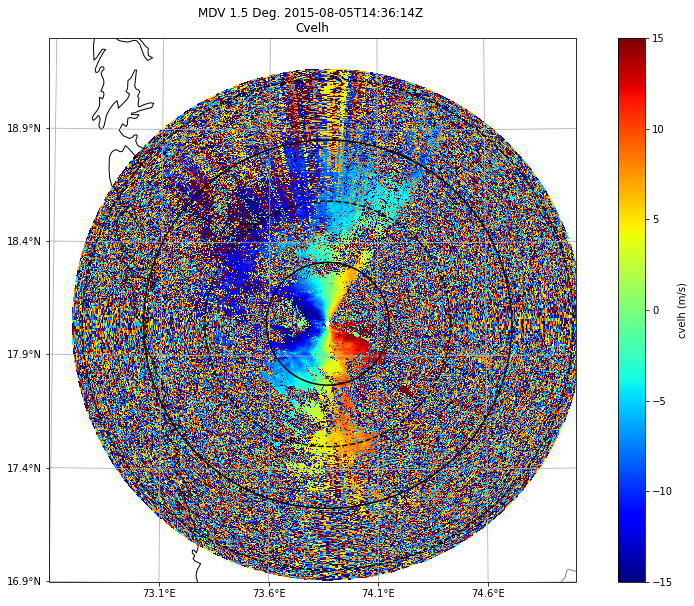

In [29]:
fig = plt.figure(figsize=(15,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('cvelh',1, vmin=-15, vmax=15, min_lon=72.6, 
                     max_lon=75, min_lat=16.9, max_lat=19.3,
                     lon_lines=np.arange(72.6,75, .5), resolution='10m',
                     lat_lines=np.arange(16.9,19.3, .5),
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0],cmap='jet')
display.plot_range_ring(30., line_style='k-')
display.plot_range_ring(60., line_style='k--')
display.plot_range_ring(90., line_style='k-')
display.plot_range_ring(120., line_style='k--')